C:\Users\ana.torres\AppData\Local\Temp\ipykernel_23536\2380140635.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap("tab20", len(trayectorias))


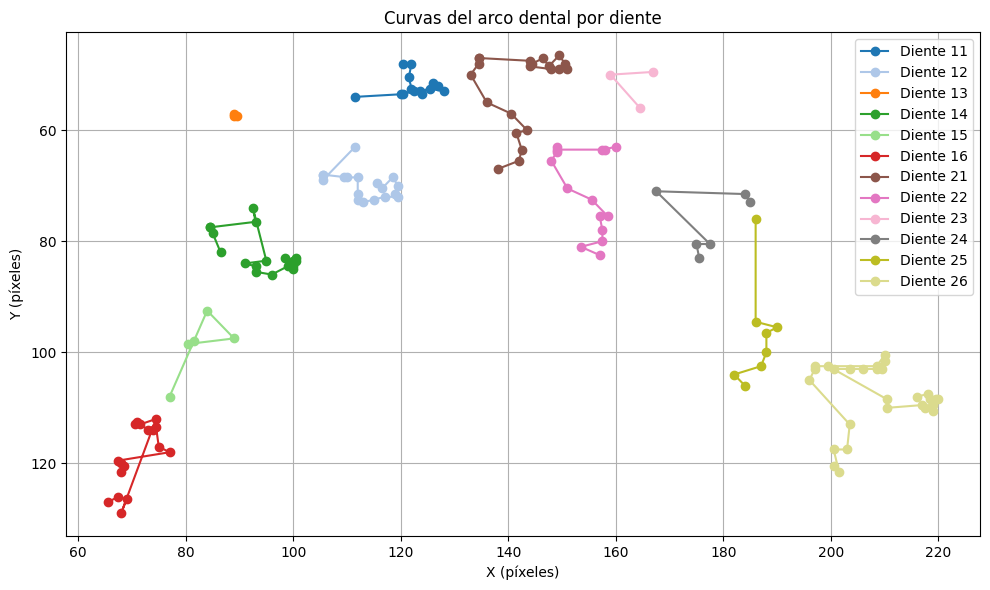

In [5]:
import os
import matplotlib.pyplot as plt
import cv2

# === CONFIGURACIÓN ===
anotaciones_dir = 'C:/Users/ana.torres/Desktop/python/biomod/DICOM/casX/jpeg_images/detections/anotaciones_finales'
imagenes_dir = 'C:/Users/ana.torres/Desktop/python/biomod/DICOM/casX/jpeg_images/detections'

# Mapeo inverso (ID -> diente)
id_to_diente = {0: '11', 1: '12', 2: '13', 3: '14', 4: '15', 5: '16', 6: '17', 7: '18',
                8: '21', 9: '22', 10: '23', 11: '24', 12: '25', 13: '26', 14: '27', 15: '28'}

# === ALMACENAR CENTROS POR DIENTE ===
trayectorias = {d: [] for d in id_to_diente.values()}

# === RECORRER ANOTACIONES ===
anotaciones = [f for f in os.listdir(anotaciones_dir) if f.endswith('.txt')]
anotaciones.sort()  # Ordenar para mantener secuencia

for nombre_archivo in anotaciones:
    ruta_txt = os.path.join(anotaciones_dir, nombre_archivo)
    imagen_path = os.path.join(imagenes_dir, nombre_archivo.replace('.txt', '.jpeg'))

    # Leer tamaño de la imagen original
    if not os.path.exists(imagen_path):
        print(f"⚠️ Imagen no encontrada: {imagen_path}")
        continue
    img = cv2.imread(imagen_path)
    h, w = img.shape[:2]

    with open(ruta_txt, 'r') as f:
        for linea in f:
            class_id, xc, yc, bw, bh = map(float, linea.strip().split())
            diente = id_to_diente[int(class_id)]
            px = xc * w
            py = yc * h
            trayectorias[diente].append((px, py))

# === VISUALIZAR TRAZAS EN UN GRÁFICO ===
plt.figure(figsize=(10, 6))
colores = plt.cm.get_cmap("tab20", len(trayectorias))

for idx, (diente, puntos) in enumerate(trayectorias.items()):
    if len(puntos) > 1:
        xs, ys = zip(*puntos)
        plt.plot(xs, ys, marker='o', label=f'Diente {diente}', color=colores(idx))

plt.gca().invert_yaxis()  # Invertir eje Y para que se parezca a la imagen
plt.title("Curvas del arco dental por diente")
plt.xlabel("X (píxeles)")
plt.ylabel("Y (píxeles)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ana.torres\AppData\Local\Temp\ipykernel_23536\2490340305.py:11: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(xs, ys, grado)
C:\Users\ana.torres\AppData\Local\Temp\ipykernel_23536\2490340305.py:11: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(xs, ys, grado)


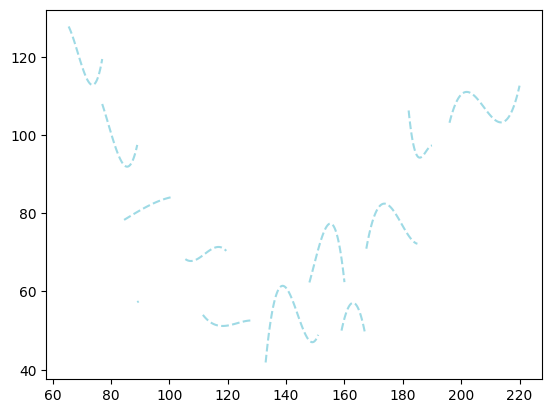

In [6]:
import numpy as np

# Ajustar una línea de tendencia polinómica a los puntos
for diente, puntos in trayectorias.items():
    if len(puntos) > 1:
        # Extraer las coordenadas X y Y
        xs, ys = zip(*puntos)
        
        # Ajustar un polinomio de segundo o tercer grado
        grado = 3  # Cambiar a 2 si prefieres un ajuste menos complejo
        coef = np.polyfit(xs, ys, grado)
        polinomio = np.poly1d(coef)
        
        # Generar puntos ajustados para la curva
        xs_ajustados = np.linspace(min(xs), max(xs), 100)
        ys_ajustados = polinomio(xs_ajustados)
        
        # Graficar la línea de tendencia
        plt.plot(xs_ajustados, ys_ajustados, label=f'Tendencia Diente {diente}', color=colores(idx), linestyle='--')

C:\Users\ana.torres\AppData\Local\Temp\ipykernel_23536\3714553523.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap("tab20", len(trayectorias))


RMSE del ajuste polinómico (grado 4): 9.44 píxeles


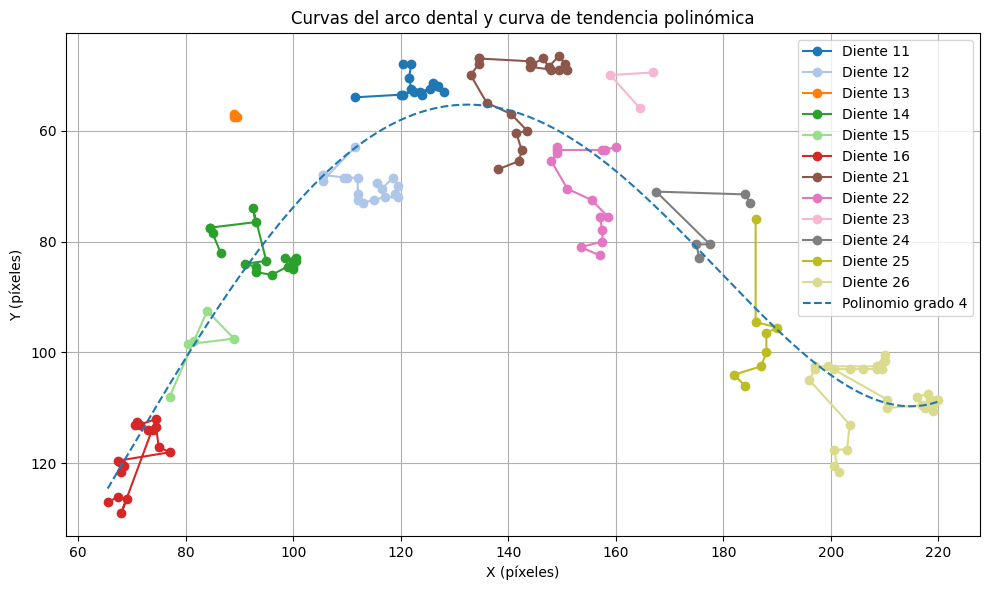

In [7]:
# 1) Recolectar todos los puntos en listas planas
xs_all, ys_all = [], []
for puntos in trayectorias.values():
    xs_all.extend([p[0] for p in puntos])
    ys_all.extend([p[1] for p in puntos])

xs_all = np.array(xs_all)
ys_all = np.array(ys_all)

# 2) Ajuste polinómico
degree = 4  # prueba con valores entre 2 y 5
coeffs = np.polyfit(xs_all, ys_all, deg=degree)
polynomial = np.poly1d(coeffs)

# 3) Generar curva suave
x_fine = np.linspace(xs_all.min(), xs_all.max(), 500)
y_fine = polynomial(x_fine)

# 4) (Opcional) Error de ajuste
y_pred = polynomial(xs_all)
rmse = np.sqrt(np.mean((ys_all - y_pred)**2))
print(f"RMSE del ajuste polinómico (grado {degree}): {rmse:.2f} píxeles")

# 5) Trazar sobre el mismo gráfico
plt.figure(figsize=(10, 6))

# Tus curvas por diente
colores = plt.cm.get_cmap("tab20", len(trayectorias))
for idx, (diente, puntos) in enumerate(trayectorias.items()):
    if len(puntos) > 1:
        xs, ys = zip(*puntos)
        plt.plot(xs, ys, marker='o', label=f'Diente {diente}', color=colores(idx))

# Curva de tendencia polinómica global
plt.plot(x_fine, y_fine, label=f'Polinomio grado {degree}', linewidth=1.5, linestyle='--')

plt.gca().invert_yaxis()
plt.title("Curvas del arco dental y curva de tendencia polinómica")
plt.xlabel("X (píxeles)")
plt.ylabel("Y (píxeles)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ana.torres\AppData\Local\Temp\ipykernel_23536\472453051.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap("tab20", len(trayectorias))


Distancia entre diente 13 y 23: 74.54 píxeles
Distancia entre diente 15 y 25: 103.99 píxeles
Relación entre distancias (13-23) / (15-25): 0.72


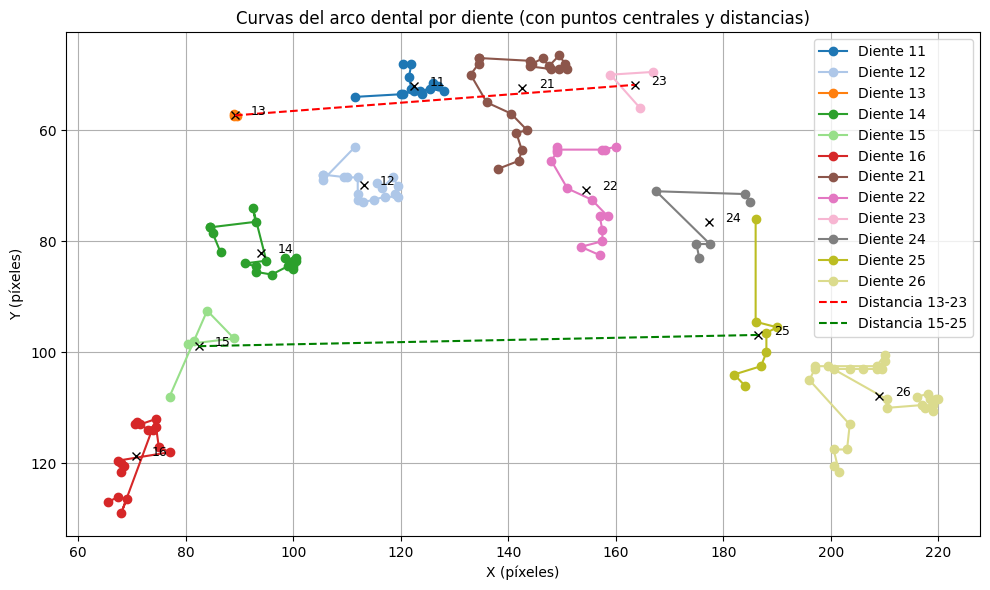

In [30]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

# === CONFIGURACIÓN ===
anotaciones_dir = 'C:/Users/ana.torres/Desktop/python/biomod/DICOM/casX/jpeg_images/detections/anotaciones_finales'
imagenes_dir = 'C:/Users/ana.torres/Desktop/python/biomod/DICOM/casX/jpeg_images/detections'

# Mapeo inverso (ID -> diente)
id_to_diente = {0: '11', 1: '12', 2: '13', 3: '14', 4: '15', 5: '16', 6: '17', 7: '18',
                8: '21', 9: '22', 10: '23', 11: '24', 12: '25', 13: '26', 14: '27', 15: '28'}

# === ALMACENAR CENTROS POR DIENTE ===
trayectorias = {d: [] for d in id_to_diente.values()}

# === RECORRER ANOTACIONES ===
anotaciones = [f for f in os.listdir(anotaciones_dir) if f.endswith('.txt')]
anotaciones.sort()  # Ordenar para mantener secuencia

for nombre_archivo in anotaciones:
    ruta_txt = os.path.join(anotaciones_dir, nombre_archivo)
    imagen_path = os.path.join(imagenes_dir, nombre_archivo.replace('.txt', '.jpeg'))

    # Leer tamaño de la imagen original
    if not os.path.exists(imagen_path):
        print(f"⚠️ Imagen no encontrada: {imagen_path}")
        continue
    img = cv2.imread(imagen_path)
    h, w = img.shape[:2]

    with open(ruta_txt, 'r') as f:
        for linea in f:
            class_id, xc, yc, bw, bh = map(float, linea.strip().split())
            diente = id_to_diente[int(class_id)]
            px = xc * w
            py = yc * h
            trayectorias[diente].append((px, py))

# === CALCULAR PUNTOS CENTRALES DE CADA DIENTE ===
puntos_centrales = {}
for diente, puntos in trayectorias.items():
    if puntos:
        puntos_centrales[diente] = np.mean(puntos, axis=0)

# === VISUALIZAR TRAZAS Y PUNTOS CENTRALES ===
plt.figure(figsize=(10, 6))
colores = plt.cm.get_cmap("tab20", len(trayectorias))

for idx, (diente, puntos) in enumerate(trayectorias.items()):
    if len(puntos) > 1:
        xs, ys = zip(*puntos)
        plt.plot(xs, ys, marker='o', label=f'Diente {diente}', color=colores(idx))
    if diente in puntos_centrales:
        cx, cy = puntos_centrales[diente]
        plt.plot(cx, cy, 'x', color='black')  # punto central
        plt.text(cx + 3, cy, diente, fontsize=9)

# === MEDIR DISTANCIAS ENTRE DIENTES ===
def distancia(d1, d2):
    if d1 in puntos_centrales and d2 in puntos_centrales:
        p1 = puntos_centrales[d1]
        p2 = puntos_centrales[d2]
        dist = np.linalg.norm(p1 - p2)  # Distancia euclidiana
        return dist
    else:
        print(f"⚠️ No se encontraron ambos dientes: {d1}, {d2}")
        return None

# === Calcular y visualizar distancias ===
distancia_13_23 = distancia('13', '23')
distancia_15_25 = distancia('15', '25')

# Mostrar las líneas de distancia en el gráfico
if distancia_13_23 is not None:
    p1 = puntos_centrales['13']
    p2 = puntos_centrales['23']
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r--', label="Distancia 13-23")
    
if distancia_15_25 is not None:
    p1 = puntos_centrales['15']
    p2 = puntos_centrales['25']
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g--', label="Distancia 15-25")

# Calcular la relación entre distancias
if distancia_13_23 is not None and distancia_15_25 is not None:
    ratio = distancia_13_23 / distancia_15_25
    print(f"Distancia entre diente 13 y 23: {distancia_13_23:.2f} píxeles")
    print(f"Distancia entre diente 15 y 25: {distancia_15_25:.2f} píxeles")
    print(f"Relación entre distancias (13-23) / (15-25): {ratio:.2f}")
    


plt.gca().invert_yaxis()
plt.title("Curvas del arco dental por diente (con puntos centrales y distancias)")
plt.xlabel("X (píxeles)")
plt.ylabel("Y (píxeles)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
